# Classification Algorithms

In [53]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn.metrics import roc_auc_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import cross validation library
from sklearn.model_selection import cross_val_score

In [54]:
# Prints statements in Bold
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))   

#### Load the dataFrame

In [55]:
data_org= pd.read_csv("Twitter-Absolute-Sigma-500.data",sep=',',header=None)

####  Data Exploration

In [56]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
0     140707 non-null int64
1     140707 non-null int64
2     140707 non-null int64
3     140707 non-null int64
4     140707 non-null int64
5     140707 non-null int64
6     140707 non-null int64
7     140707 non-null int64
8     140707 non-null int64
9     140707 non-null int64
10    140707 non-null int64
11    140707 non-null int64
12    140707 non-null int64
13    140707 non-null int64
14    140707 non-null float64
15    140707 non-null float64
16    140707 non-null float64
17    140707 non-null float64
18    140707 non-null float64
19    140707 non-null float64
20    140707 non-null float64
21    140707 non-null float64
22    140707 non-null float64
23    140707 non-null float64
24    140707 non-null float64
25    140707 non-null float64
26    140707 non-null float64
27    140707 non-null float64
28    140707 non-null int64
29    140707 non-null int64
30    140707 non-null

In [57]:
data_org.head(5)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


#### Assigning the Predictor and the Target Variables

In [58]:
data_org.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


#### Identifying the Predictor and Target Variables

In [59]:
X=data_org.loc[:,0:76]
y=data_org.loc[:,77]
print(X.shape)
print(y.shape)

(140707, 77)
(140707,)


#### Check if the data is balanced

0.0    112932
1.0     27775
Name: 77, dtype: int64


Text(0.5,1,"Class Distribution  Buzz -'0' Vs Non-Buzz - '1'")

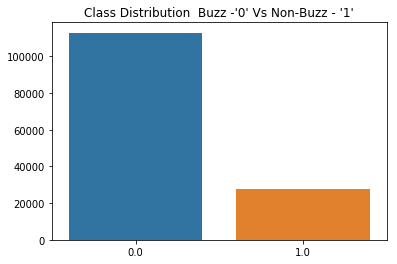

In [60]:
class_zero =y.value_counts().values[0]
class_one = y.value_counts().values[1]
print (y.value_counts())

# Barplot to show the distribution of classes
sns.barplot(x = y.value_counts().index.values,y = y.value_counts().values)
plt.title("Class Distribution  Buzz -'0' Vs Non-Buzz - '1'")

#### Scaling and Splitting the Dataset

In [61]:
# Load the Libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Randomizing the dataset and using 10% of the dataset for building models

_,sample_data,_,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

# Splitting data train / test ratio of 80:20                                      
X_train, X_test, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Learnings:
1. Since the dataset is imbalanced accuracy score may not be a right metric to measure the performance of classification Models.

2. We see that the positive class is in Minority or imbalanced.So we decided to use the performance of a  dummy_classifier as a base line to compare other classification models.



# Dummy Classifier

In [62]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0.]
Test score: 0.80


#### We observe that our baseline model accuracy is 81%

## Decision Trees Classifier

#### Let’s first fit a decision tree with default parameters to get a baseline idea of the performance

In [63]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
# Decision Tree with default parameters Gini Index,Max_depth=0
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
dtree_pred_train = dtree.predict(X_train)
dtree_pred_test = dtree.predict(X_test)
print("Train AUC Score {}".format(roc_auc_score(dtree_pred_train,y_train)))
print("Test AUC Score {}".format(roc_auc_score(dtree_pred_test,y_test)))


Train AUC Score 1.0
Test AUC Score 0.9188524564338624


#### Clearly from the Train Auc Score and Test Auc score we see that our model is overfit

In [64]:
report_table = [['Decision Tree(Default)', 'Gini Index ,Max depth=0',dtree.score(X_train, y_train),dtree.score(X_test, y_test), roc_auc_score(dtree_pred_train,y_train), roc_auc_score(dtree_pred_test, y_test) ]]

### Testing the Generalization of Decision Tree Model with Cross validation

Average cross-validation score: 0.95


Text(0.5,1,'Average Score:0.9501944316601814')

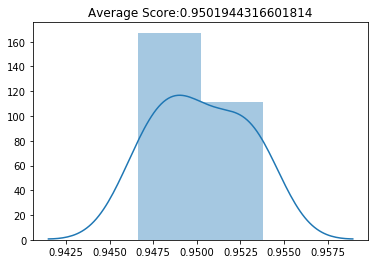

In [65]:
# We use a cross validation model with default value 10
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dtree,X,y,cv=10)
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))

# Graph displaying the variation in model accuracy with different train:test data split ratios
sns.distplot(cv_scores)
plt.title('Average Score:{}'.format(np.mean(cv_scores)))

#### Clearly, we can see a difference in the accuracy score ,the model generalizes better with cross validation(Including all samples in the dataset to train the data

### Parameter Tuning for Decision Trees using Grid Search

#### Lets try to find the best parameters for Decision Tree:
1.max_depth - Ideally trees with larger values for max_depth capture maximum information from the data
2.max_features -Indicates number of features to be considered for best split

In [66]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
parameter_grid = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 2, 3, 4, 5],'max_features': [1, 2, 3, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter_grid, cv=5)
grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Best parameters for improving Decision Tree model Accuracy
dtree = grid_search.best_estimator_
dtree

print("****************************************************")
cross_validation = StratifiedKFold(y, n_folds=10)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter_grid, cv=5)
grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtree = grid_search.best_estimator_
dtree


Best score: 0.9616863411202001
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'splitter': 'best'}
****************************************************
Best score: 0.961814266525475
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'splitter': 'best'}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### The best parameters for decision tree are -  maximum tree: depth 5 ,max_features: 4 , Gini index as the impurity criterion produces 96% accuracy

In [67]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with default parameters Gini Index,Max_depth=0
dtree_tuned = DecisionTreeClassifier(random_state=0,max_depth=5,max_features=4,splitter='best',criterion='gini')
dtree_tuned.fit(X_train, y_train)
dtree_pred_train_tuned = dtree.predict(X_train)
dtree_pred_test_tuned = dtree.predict(X_test)


print("Model Name : Decision Tree")
print("Model Parameters: CV=5,max_depth=5,max_features=5,Impurity Criterion=Gini Index")
print("Train Accuracy {}".format(dtree_tuned.score(X_train,y_train)))
print("Test Accuracy {}".format(dtree_tuned.score(X_test,y_test)))


Model Name : Decision Tree
Model Parameters: CV=5,max_depth=5,max_features=5,Impurity Criterion=Gini Index
Train Accuracy 0.9673063255152807
Test Accuracy 0.9566607460035524


#### Conclusion: Decision trees are prone to overfitting when there are many features. The accuracy of the model slightly improved with tuning the parameters of model

# LogisticRegression

#### Logistic Regression with default parameters to get a baseline idea of the performance

In [68]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# Use score method to get accuracy of model
logisticRegr_score_train= logisticRegr.score(X_train, y_train)
logisticRegr_score_test=logisticRegr.score(X_test, y_test)
print("Train Score : {}".format(logisticRegr_score_train))
print("Test Score : {}".format(logisticRegr_score_test))

Train Score : 0.9495380241648899
Test Score : 0.9484902309058615


### Testing the Generalization of Logistic Regression Model with Cross validation

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg,X,y)
print("Cross-validation scores: {}".format(scores))
scores = cross_val_score(logreg,X,y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96546063 0.96518272 0.96714426]
Cross-validation scores: [0.96585175 0.96471466 0.96457127 0.96673892 0.96769838]
Average cross-validation score: 0.97


#### Logistic Regression with Hyper parameter Tuning
applying l1 and l2 regression to avoid overfitting

The trade-off parameter of logistic regression that determines the strength of the regularization is called C, and higher values of C correspond to less regularization (where we can specify the regularization function).
C is actually the Inverse of regularization strength(lambda)

In [70]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

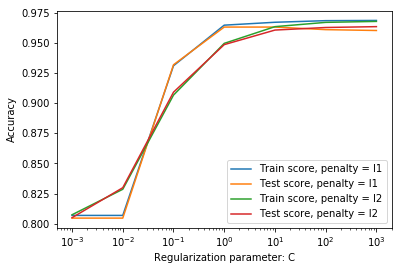

In [71]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

#### We trained a logistic regression model with penalty L1 & L2 and for varying values of C.From the above plot we find that the accuracy is highest with L1 and C=1

### Retrain Logistic Regression with best parameters

In [72]:
# Retraining model using best parametersfrom sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty = 'l1', C = 1)
logisticRegr.fit(X_train, y_train)

# Use score method to get accuracy of model
logisticRegr_train= logisticRegr.predict(X_train)
logisticRegr_test=logisticRegr.predict(X_test)
print("Train Score : {}".format(logisticRegr.score(X_train,y_train)))
print("Test Score : {}".format(logisticRegr.score(X_test,y_test)))
report_table =report_table +[['Logistic Regression', 'L1,C=1',logisticRegr.score(X_train,y_train),logisticRegr.score(X_test,y_test), roc_auc_score(logisticRegr_train, y_train), roc_auc_score(logisticRegr_test, y_test) ]]

Train Score : 0.9646410803127221
Test Score : 0.9626998223801065


# K neighbors classifier

#### Train a KNN with default parameters to get a baseline idea of the performance with K=3

In [75]:
# Import library for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Testing KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Accuracy {}".format(knn.score(X_train, y_train)))
print("Test Accuracy {}".format(knn.score(X_test, y_test)))

Train Accuracy 0.9751243781094527
Test Accuracy 0.9573712255772646


#### Find the optimal K value

In [76]:
# Import library for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

train_score_array=[]
test_score_array=[]

# Testing KNN with K = 1 to 12
for k in range(1,12):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

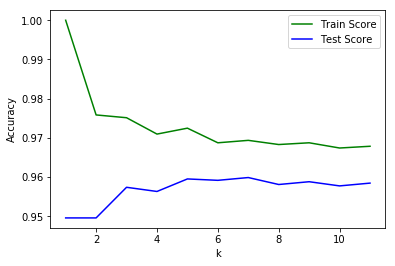

In [77]:
x_axis = range(1,12)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

######  From the plot K=4 is the optimal value

In [78]:
#Training KNN Classifier with K=4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred_train=knn.predict(X_train)
knn_pred_test=knn.predict(X_test)
print('Accuracy of Train dataset: {:.4f}'.format(knn.score(X_train, y_train)))
print('Accuracy of Test dataset : {:.4f}'.format(knn.score(X_test, y_test)))
report_table =report_table+ [['KNN', 'K=4',knn.score(X_train, y_train),knn.score(X_test, y_test), roc_auc_score(knn_pred_train, y_train), roc_auc_score(knn_pred_test, y_test)]]

Accuracy of Train dataset: 0.9709
Accuracy of Test dataset : 0.9563


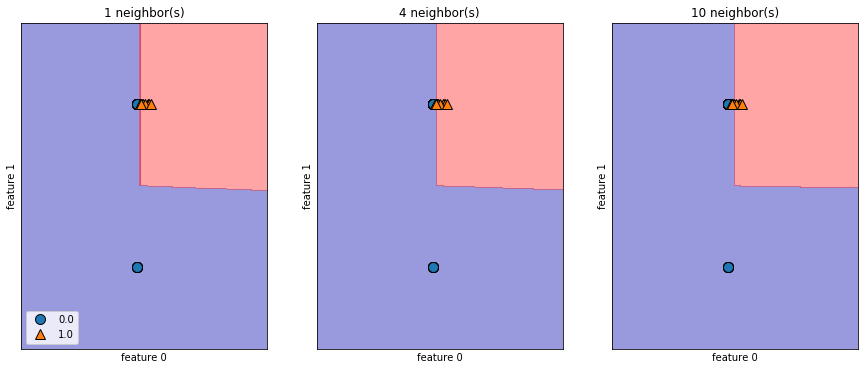

In [79]:
import mglearn.plots
X_b = X_train[100:150,[2,45]]
y_b = y_train[100:150]
#print(X_train.shape)
#print(X_b.shape)
#print(y_b.shape)
fig, axes = plt.subplots(1, 3, figsize = (15, 6))

for n_neighbors,ax in zip([1,4,10],axes):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_b, y_b) 
    mglearn.plots.plot_2d_separator(knn, X_b, fill=True,ax=ax,eps=0.5, alpha=.4)
    mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()    

# Support Vector Machines

#### Basic SVM with default hyperparameters

In [80]:
from sklearn.svm import SVC
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
print("Accuracy")
print("Train Accuracy  {}".format(svc.score(X_train, y_train)))
print("Test Accuracy {}".format(svc.score(X_test, y_test)))

Accuracy
Train Accuracy  0.898542999289268
Test Accuracy 0.8991119005328597


#### Linear SVM with default hyperparameters

In [81]:
#default linear kernel
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
print('Accuracy Score:')
print("Train Accuracy of Linear SVM {}".format(svc.score(X_train, y_train)))
print("Test Accuracy of Linear SVM {}".format(svc.score(X_test, y_test)))

Accuracy Score:
Train Accuracy of Linear SVM 0.9591329068941009
Test Accuracy of Linear SVM 0.958436944937833


#### Non Linear / Polynomial SVM with default hyperparameters

In [82]:
# Default Polynomial Kernel
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
print('Accuracy Score:')
print("Train Accuracy of Non Linear SVM {}".format(svc.score(X_train, y_train)))
print("Test Accuracy of Non Linear SVM {}".format(svc.score(X_test, y_test)))
print("We can observe that accuracy of Linear SVM is greater than the Non Linear / Polynomial SVM")

Accuracy Score:
Train Accuracy of Non Linear SVM 0.8092572850035537
Test Accuracy of Non Linear SVM 0.8092362344582593
We can observe that accuracy of Linear SVM is greater than the Non Linear / Polynomial SVM


For large values of C, a smaller-margin hyperplane is chosen,we can cause overfitting of the model
A very small value of C, a larger-margin separating hyperplane is close, we can cause underfitting.

In [83]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc')
grid_svc_lin.fit(X_train, y_train)
grid_svc_lin.best_params_
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)
print('Best score: {}'.format(grid_svc_lin.best_score_))
print('Best parameters: {}'.format(grid_svc_lin.best_params_))

svc_param = grid_svc_lin.best_estimator_
svc_param


Best score: 0.991598747556719
Best parameters: {'C': 10}


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Running a Linear SVM with Optimal C=10

In [84]:
from sklearn.svm import SVC
svc_lin=SVC(kernel='linear',C=10)
svc_lin.fit(X_train,y_train)
svc_lin_train_pred=svc_lin.predict(X_train)
svc_lin_test_pred=svc_lin.predict(X_test)
report_table = report_table + [['LinearSVC', 'C = 10', svc_lin.score(X_train, y_train), svc_lin.score(X_test, y_test), roc_auc_score(svc_lin_train_pred, y_train), roc_auc_score(svc_lin_test_pred,y_test)]]

#### Running a non linear SVM with Optimal C=10

In [85]:
from sklearn.svm import SVC
svc_lin=SVC(kernel='poly',C=10)
svc_lin.fit(X_train,y_train)
svc_lin_train_pred=svc_lin.predict(X_train)
svc_lin_test_pred=svc_lin.predict(X_test)
report_table = report_table + [['Non LinearSVC', 'C = 10', svc_lin.score(X_train, y_train), svc_lin.score(X_test, y_test), roc_auc_score(svc_lin_train_pred, y_train), roc_auc_score(svc_lin_test_pred,y_test)]]

#### Finding optimal gamma and c using Gridsearch

In [86]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_lin=SVC()
grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc')
grid_svc_lin.fit(X_train, y_train)
grid_svc_lin.best_params_
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)
print('Best score: {}'.format(grid_svc_lin.best_score_))
print('Best parameters: {}'.format(grid_svc_lin.best_params_))

svc_param = grid_svc_lin.best_estimator_
svc_param

Best score: 0.9896661410284062
Best parameters: {'C': 100, 'gamma': 1}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score','Test auc score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
Decision Tree(Default),Decision Tree(Default),"Gini Index ,Max depth=0",1.000000,0.950977,1.000000,0.918852
Logistic Regression,Logistic Regression,"L1,C=1",0.964641,0.962700,0.959711,0.954737
KNN,KNN,K=4,0.970949,0.956306,0.968522,0.947152
LinearSVC,LinearSVC,C = 10,0.965529,0.962345,0.957727,0.951812
Non LinearSVC,Non LinearSVC,C = 10,0.870736,0.876021,0.928344,0.930921


KNN gives the good result for lower values of K ,works best on the numerical features. However , with larger dimensional space of 77 features,it is not preferable to use KNN
Non Linear SVC is the best  with C=10, can handle high dimensional space,is not sensitive to outliers. However computational time will be large for Non Linear SVC.